# Filtering and predicting using the darts filters
In this notebook, we will look at the Kalman filtering algorithm being used to improve quality of a noise affected data. White noise is quite common part of the data retrieved from any kind of sensors.

The Kalman filter is a different kind of model in Darts, in that it's a `FilteringModel` (and not a `ForecastingModel`). `FilteringModel`s can be used to smooth series, and more generally (in the case of the Kalman filter), to infer the value of the state of some underlying dynamical system.

In this notebook, we'll generate a simple synthetic dataset and see hoe the Kalman filter can be used to de-noise it. Note that this is a toy example, mostly to show how the Darts Kalman filter API works.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import KalmanFilter

## Adding white noise to the spiral drawing

First let's produce a simple drawing and add a significant white noise to it.

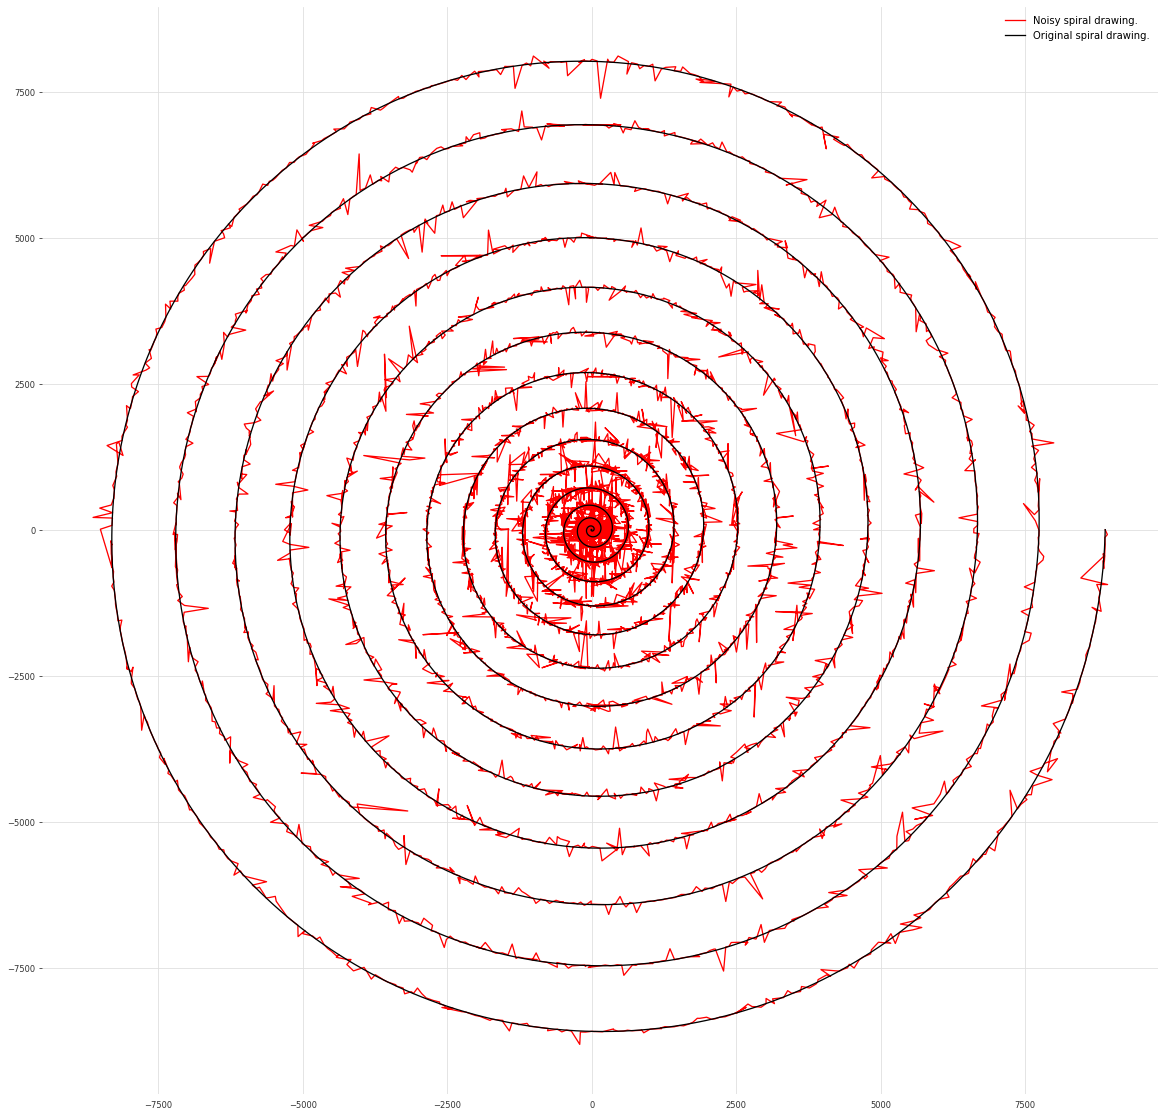

In [2]:
NOISE_DISTANCE = 0.5
SAMPLE_SIZE = 10000
RESIZE_NOISE = 150

# Prepare the drawing
theta = np.radians(np.linspace(0,360*15,SAMPLE_SIZE))
r = theta**2
x_2 = r*np.cos(theta)
y_2 = r*np.sin(theta)

# add white noise (gaussian noise, can be mapped from the random distribution using rand**3)
# and resize to RESIZE_NOISE
x_2_noise = x_2 + (np.random.normal(0, NOISE_DISTANCE, SAMPLE_SIZE)**3)*RESIZE_NOISE
y_2_noise = y_2 + (np.random.normal(0, NOISE_DISTANCE, SAMPLE_SIZE)**3)*RESIZE_NOISE

plt.figure(figsize=[20,20])
plt.plot(x_2_noise,y_2_noise,color='red', label='Noisy spiral drawing.')
plt.plot(x_2,y_2, label='Original spiral drawing.')
plt.legend()
plt.show()

## Configure the kalman filters and use it to adjust the measured data.

By experimenting with the Kalman filter we can reduce the noise from previously generated noise-affected drawing quite significantly without using the original (real, often impossible to measure) values. Here, we'll do it for the "x" and "y" (both univariate) time series separately. Note that we could also build one multivariate time series containing both the "x" and "y" components, and apply the Kalman filter on it (we leave it as an exercise to the reader ;) 

Finally, here we do not specify `num_samples` so `KalmanFilter.filter()` returns the mean state only. If we specify any value of `num_samples` greater than 1, the returned `TimeSeries` will be stochastic.

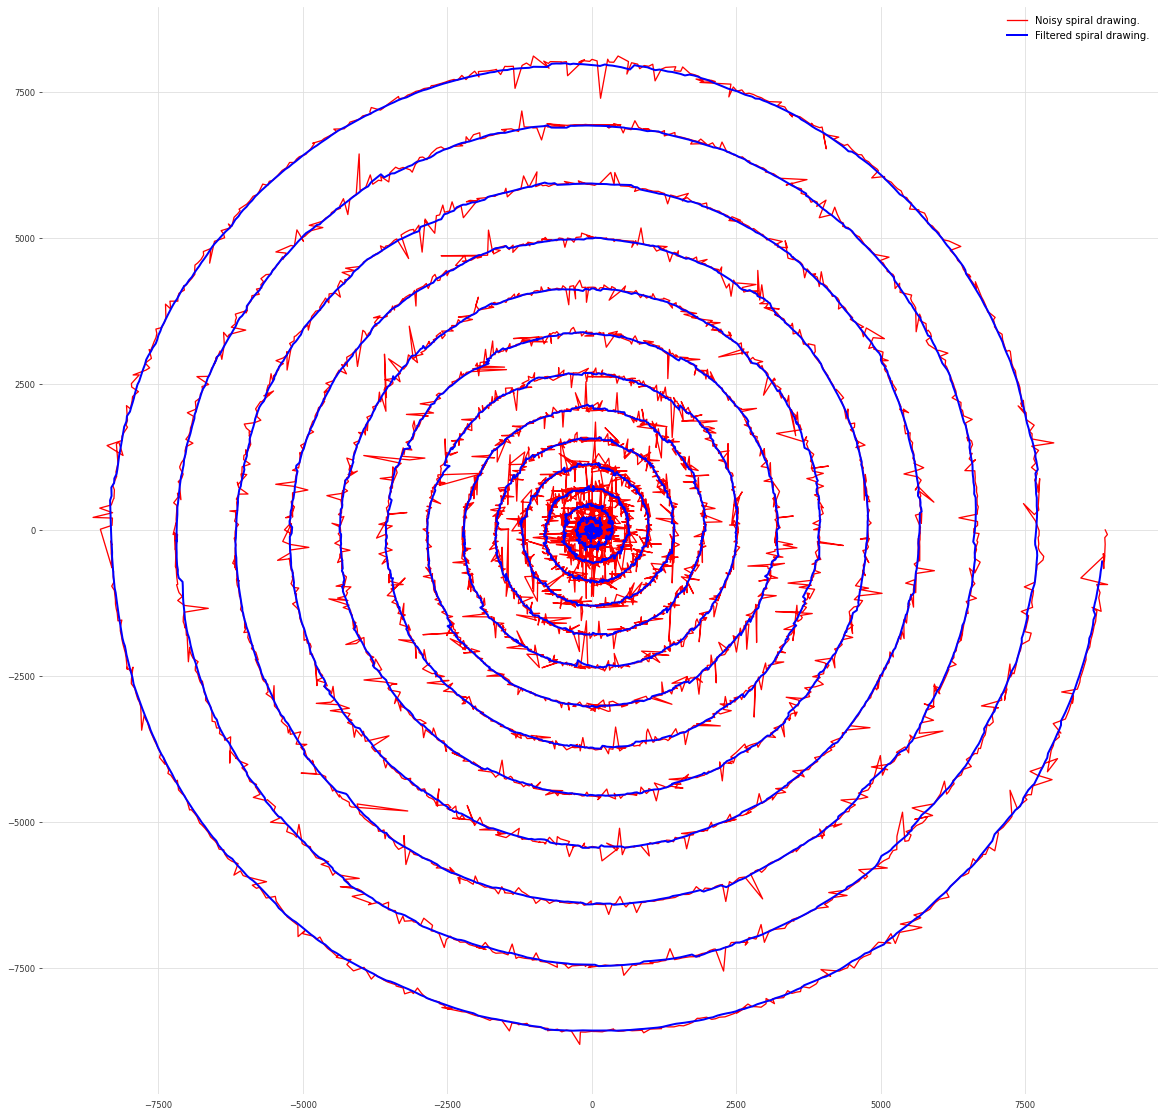

In [4]:
filtered_x = KalmanFilter(P=1000., R=50, Q=1).filter(TimeSeries.from_values(x_2_noise)).values()
filtered_y = KalmanFilter(P=1000., R=50, Q=1).filter(TimeSeries.from_values(y_2_noise)).values()

plt.figure(figsize=[20,20])
plt.plot(x_2_noise,y_2_noise,color='red', label='Noisy spiral drawing.')
plt.plot(filtered_x, filtered_y, color='blue', linewidth=2, label='Filtered spiral drawing.')
plt.legend()